# FX and macro dashboard - experimental

Features:
* static charts of fx rates and bond yields

In [1]:
from datavis import tsget as tg

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import pandas as pd

# %matplotlib notebook
%matplotlib inline

In [2]:
# The following help draw interactive charts

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [3]:
eurgbp = tg.TimeSeries('egx',start=dt(2010,1,1))
cnyusd = tg.TimeSeries('yux',start=dt(2010,1,1))
cadusd = tg.TimeSeries('cux',start=dt(2010,1,1))
jpyusd = tg.TimeSeries('jux',start=dt(2010,1,1))
gbpusd = tg.TimeSeries('gux',start=dt(2010,1,1))

[]

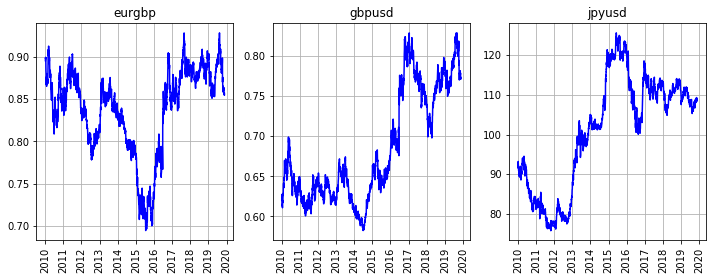

In [4]:
plt.figure(figsize=(12, 4),facecolor = 'w')

plt.subplot(131)
plt.title(eurgbp.name)
plt.plot(eurgbp.timeseries.index,eurgbp.timeseries,'b-')
plt.xticks(rotation=90)
plt.grid(True)
plt.subplot(132)
plt.title(gbpusd.name)
plt.plot(gbpusd.timeseries.index,gbpusd.timeseries,'b-')
plt.xticks(rotation=90)
plt.grid(True)
plt.subplot(133)
plt.title(jpyusd.name)
plt.plot(jpyusd.timeseries.index,jpyusd.timeseries,'b-')
plt.xticks(rotation=90)
plt.grid(True)

plt.plot()

In [5]:
bund_10y = tg.TimeSeries('egeg10ycpy',start=dt(2010,1,1))
gilt_10y = tg.TimeSeries('gukg10ycpy',start=dt(2010,1,1))

[]

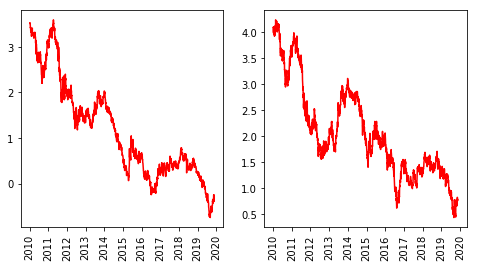

In [6]:
plt.figure(figsize=(8,4), facecolor = 'w')

plt.subplot(121)
plt.plot(bund_10y.timeseries.index,bund_10y.timeseries,'r-')
plt.xticks(rotation=90)
plt.subplot(122)
plt.plot(gilt_10y.timeseries.index,gilt_10y.timeseries,'r-')
plt.xticks(rotation=90)

plt.plot()


In [7]:

def single_line(start=0, end=1):
    
    series = eurgbp
    start_loc = int(np.round(start * (len(series.timeseries)-1)))
    end_loc = int(np.round(end * (len(series.timeseries)-1)))
    
    sliced_data=series.timeseries.iloc[start_loc:end_loc]

    plt.figure(figsize=(6, 4),facecolor = 'w')

    plt.title(series.name)
    plt.plot(sliced_data.index,sliced_data,'b-')
    plt.xticks(rotation=90)
    plt.grid(True)

    plt.plot()

In [8]:
chart1 = interactive(single_line, start=(0.0, 1.0, 0.001), end=(0.0, 1.0, 0.001))
display(chart1)

A Jupyter Widget

In [9]:
eurgbp_MAs = tg.windows(eurgbp)
eurgbp_MAs.tail()

,eurgbp,eurgbp_MA5,eurgbp_expMA5,eurgbp_MA10,eurgbp_expMA10,eurgbp_MA30,eurgbp_expMA30,eurgbp_MA90,eurgbp_expMA90
Date,,,,,,,,,
2019-11-13,0.8576,0.85908,0.859397,0.86047,0.861732,0.869013,0.872901,0.891103,0.882985
2019-11-14,0.8557,0.85792,0.858502,0.85982,0.860951,0.868020,0.872124,0.890607,0.882568
2019-11-15,0.8567,0.85698,0.858066,0.85922,0.860401,0.866810,0.871428,0.890157,0.882173
2019-11-18,0.8546,0.85646,0.857226,0.85832,0.859650,0.865550,0.870668,0.889698,0.881751
2019-11-19,0.8568,0.85628,0.857123,0.85794,0.859281,0.864210,0.870042,0.889221,0.881370


In [10]:
def moving_avg(rolling_mean = True, exp_mean = False, start=0, end=1):

    data = eurgbp_MAs
    
    # The mask variables are boolean lists with True if column name has specified string
    # in, but all values are False if the "rolling_mean" or "exp_mean" variables are
    # set to False
    mask_rm = data.columns.str.contains('_MA', regex=False) * rolling_mean
    mask_em = data.columns.str.contains('_expMA', regex=False) * exp_mean
    mask = mask_rm + mask_em
    mask[0] = True
    
    start_loc = int(np.round(start * (len(data)-1)))
    end_loc = int(np.round(end * (len(data)-1)))
    
    sliced_data=data.loc[:,mask].iloc[start_loc:end_loc]

    plt.figure(figsize=(6, 4),facecolor = 'w')

    plt.title(data.columns[0])
    plt.plot(sliced_data.index,sliced_data)
    plt.xticks(rotation=90)
    plt.grid(True)

    plt.plot()

In [11]:
chart2 = interactive(moving_avg, rolling_mean=False, exp_mean=False,
                     start=(0.0, 1.0, 0.001), end=(0.0, 1.0, 0.001))
display(chart2)

A Jupyter Widget